<img src='images/besm.png' width='150px'>

<center> درس پردازش زبان‌های طبیعی </center>
<center> آزمایشگاه پردازش هوشمند متن و زبان و علوم انسانی محاسباتی </center>
<br>
<center> http://language.ml </center>
<center> contact: asgari [AT] berkeley [dot] edu </center>


<h1 style='direction:rtl'> 
    فارسی - پیش پردازش و بررسی متن
</h1>
  

</h2> <h2 style='direction:rtl'>نام و نام خانوادگی و شماره دانشجویی 
    
  

</h2> <h2 style='direction:rtl;'>یک پاراگراف توضیح در مورد متنی که انتخاب کرده اید: 



<h2 style='direction:rtl;'> § مارک‌آپ  </h2> 

<p style='direction:rtl;' >
برای یادگیری بیشتر به این <a href='https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github'> لینک  </a> مراجعه کنید.
        
</p>

<h2 style='direction:rtl;'> § نمونه‌ای از متن  </h2> 



In [54]:
import random 
import numpy as np
import nltk
import pandas as pd
import codecs
import tqdm
    
# Hafez and Saadi collection -- Hafez [0:8384] Saadi[9384::]
HAFEZ_end=8384
SAADI_start=9384
mesra_collection = [x.strip().split() for x in tqdm.tqdm(codecs.open('farsi/mesra.txt','rU','utf-8').readlines())]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 329707/329707 [00:00<00:00, 970691.24it/s]


<h4 style='direction:rtl;'> مثال بررسی اولیه داده غزلیات حافظ و سعدی. برای مطالعه بیشتر به مقاله زیر مراجعه کنید  </h4> 

<br/>

Asgari, Ehsaneddin, and Jean-Cédric Chappelier. <b>Linguistic resources and topic models for the analysis of persian poems.</b> <i>Proceedings of NAACL-HLT Workshop on Computational Linguistics for Literature. 2013 </i>.

https://aclanthology.org/W13-1404.pdf 

<h2 style='direction:rtl;'> § نرمالایز کردن  </h2> 



In [55]:
from __future__ import unicode_literals
from hazm import *

normalizer = Normalizer()

mesra_normalized = [[normalizer.normalize(y) for y in x] for x in tqdm.tqdm(mesra_collection)]


 31%|█████████████████████████████▏                                                                | 102448/329707 [00:11<00:23, 9859.28it/s]


 62%|██████████████████████████████████████████████████████████▌                                   | 205580/329707 [00:22<00:12, 9859.77it/s]


  0%|                                                                                                        | 0/2360566 [163:02:24<?, ?it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████▌      | 306968/329707 [00:35<00:02, 8728.89it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 329707/329707 [00:37<00:00, 8763.88it/s]


In [56]:
for x in random.sample(mesra_normalized, 30):
    print(' '.join(x))

شکنج طره پرخم حجابست
سعی پا بر جا زمین آخر به دندانهاگرفت
کبک نیابد امان ز چنگل شاهین
به جز ریش بلا مرهم مبادا ریسه ریشان را
محروم شد ز روح فراوان صبحگاه
گر این یأس از شمار سال و ماه‌ کلفتم خیزد
بر پشت فلک نهند پا را
غافلان‌گرم انتظار و محرمان را تاب نیست
چو زانوی شتر تو گشاده شد ز عقال
آرزوی تو گر آنست که: من کشته شوم
طلع الصبح من وراء حجاب
بر بوی آنکه لطف تو دامن بگسترد
ما چنین مست و تو چنان مخمور
کوه تحملی‌که تو دیدی سپند بود
روی تو قبلهٔ ملک کوی تو کعبه فلک
گرد ما هم قدح ناز دو بالا زده است
تیره کند شراب ما تا بزنیم هین و هین
راحت جان مبتلا است بلا
در سالها نیامد بر سینه زین خدنگی
غم بود بستر و حیرت بالین
بار دگر بر زنم سر ز گریبان عشق
بی‌پر و بالی شد افسون جنون منقاری‌ام
نعمت الله را به دست آور
ساقیی کردی بشر را چل صبوح
شمشیر کین باز آن صنم برقصه دلها می کشد
که مرا این همه از دیدهٔ خون‌بار افتاد
آتشین آب و گلین رطل کند درمانم
یار من یاور من دل من دلبر من
تو نیز ظاهر می‌کن اگر بیان داری
گر نداری درد ، درمان کی دهند


In [57]:
normalizer.normalize("روحُ القدس2 ")

'روح القدس۲ '

In [58]:
dadma_normalizer.normalize("روحُ القدس 2 ")

'روحُ القدس'

In [59]:
from dadmatools.models.normalizer import Normalizer

dadma_normalizer = Normalizer(
    full_cleaning=True,
    unify_chars=True,
    refine_punc_spacing=True,
    remove_extra_space=True,
    remove_puncs=False,
    remove_html=False,
    remove_stop_word=False,
    replace_email_with="<EMAIL>",
    replace_number_with="<NUM>",
    replace_url_with="",
    replace_mobile_number_with=None,
    replace_emoji_with=None,
    replace_home_number_with=None,
)

#mesra_normalized_dadma = [[dadma_normalizer.normalize(y) for y in x] for x in tqdm.tqdm(mesra_collection)]

In [60]:
for x in random.sample(mesra_normalized, 30):
    print(' '.join(x))

وگر زهر از لب خنجر ننوشی نیش ما باشی
بگو بسوز که بر من به برگ کاهی نیست
ور بریزی قدحی مالامال
رهزنانرا رهبرانیم رهروانرا راهوار
هر چه بینی هر که آید در نظر
آن صورت آراسته را بیش میارای
دلش که مانده شود آسمان، در آزارم
شرری رو به آسمان نرسید
قومی که در فنا به دل یکدگر زیند
نور دو چشم من توئی رخ بنما جکی جکی
لبریز اشکم جام کو؟ آن آب آتش فام کو؟
هر که بنید روی میمون ترا هر بامداد
بسکلد صد لنگر از دیوانگی
کی بدست آید چو من رفتم ز دست
چون حباب آن دم که سیر آهنگ این دریا شدم
مائیم صفات و صفت از ذات جدا نیست
ای زلف یار تاکی با شانه همزبانی
محتشم در صفت آری به شکر ریزی تو
مردن مردان کنون آمد پدید
که تو جان را پناه و آرامی
نظاره در قلمرو آیینه نارساست
نور شمع آیینه وپروانه جوهر می‌شود
هم قبلهٔ عشاقی و هم کعبهٔ مشتاق
سرش آنگاه در پای تو باشد
به جفایی و قفایی نرود عاشق صادق
رو جمله گوش باش که جای شنفتن است
چون از این جا نیستم این جا غریبم من غریب
روی ترش گر کنی تلخ تو شیرین گوار
همچو سید از این جهان بگذشت
از لطف طبع ترک تن و توش کرده‌اند


<h2 style='direction:rtl;'> § جمله‌بندی  </h2> 



In [61]:
mesra_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(mesra_normalized)]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 329707/329707 [00:00<00:00, 351801.63it/s]


In [62]:
for x in random.sample(mesra_sentences, 30):
    print(' ### '.join(x))

وان جان چو آتش را زان رطل بفرماید
رو که بدین عاشقی سخت عظیم گولکی
از حرف تو بر لب شکری بست نباتم
خلقت آئینه‌نما نیست دگر چیزی هست
پیش چشم شوخ کافر کیش او خواهد فتاد
چون دجلهٔ بغداد شود دامن الوند
طواف کعبه عشق از کسی درست آید
عشق بی ‌رنگ از این وسوسه‌ها مستغنی است
این چه چوگان سر زلف و چه گوی ذقن است
گر همه در چشم غلتد خاک بر سر می‌ کند
تا دل ریش من آرام بگیرد نفسی
عیش رسوایی به ‌کارم‌ کوچه ‌گردان وفاست
تا لاجرم به مردی با پاره پاره جانی
نرسید فطرت هیچکس به خیال بیدل و معنی‌اش
موج خون دل فرهاد چو می‌زد بر کوه
بی محابا ده تو ای ساقی مدام
شرم‌دار از طلب‌که بر در خلق
چون ناله‌های زنجیر یک پا و صد رکابیم
هر چه آنرا خواند جان بتوان تراست
ازین بزم اگر دفع من واجبست
آفت اندوختنی می‌خواهد
تا مشورت به خوی تو بیدادگر نکرد
ز چهره پرده برانداز، تا سر اندازی
ترسم از ضعف به گوشت نرسد فریادم
چو او باشد بغیر از او نظر کردن، توان؟ ### نتوان
در سر بتافتست پس از دست رفت سر
آب است ز شبنم دل هر برگ ‌گل امروز
ز معنی چون اثر بردم نه او آمد نه من رفتم
تا کی ز چارسوی تعلق خرد کسی
اینقدرها به قفس خاطر صیادم کرد

In [63]:
sent_tokenize("او به خانه رفت و غذا خورد.") 

['او به خانه رفت و غذا خورد.']

<h2 style='direction:rtl;'> § توکنایزیشن  </h2> 



In [64]:
mesra_tokens = [[word_tokenize(sent) for sent in sents] for sents in tqdm.tqdm(mesra_sentences)]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 329707/329707 [00:02<00:00, 124474.73it/s]


In [65]:
random.sample(mesra_tokens, 30)

[[['تا',
   'تو',
   'گویی',
   'کاین',
   'غرض',
   'نفی',
   'من',
   'است',
   'از',
   'لا',
   'و',
   'لن']],
 [['جهان', 'بر', 'دل', 'من', 'چو', 'زندان', 'مکن']],
 [['ای', 'بخت', 'من', '،', 'به', 'دست', 'من', 'انداز', 'دامنش']],
 [['سالها', 'باید', 'که', 'تا', 'پیدا', 'شود']],
 [['ضمیر', 'را', 'سبل', 'است', 'آن', 'و', 'دیده', 'را', 'پرده']],
 [['نه', 'هر', 'وقتم', 'به', 'یاد', 'خاطر', 'آید']],
 [['که', 'غیرتو', 'نمی', 'زیبد', 'کسی', 'دیگر', 'به', 'جای', 'تو']],
 [['در', 'کس', 'نمی\u200cگشایم', 'که', 'به', 'خاطرم', 'درآید']],
 [['نی', 'زیر', 'و', 'زبر', 'کردن', 'زیر', 'و', 'زبری', 'را']],
 [['چهرهٔ', 'او', 'اصل', 'جمالست', 'و', 'بس']],
 [['خمش', 'از', 'سخن', 'گزاری', 'تو', 'مگر', 'قدم', 'نداری']],
 [['تا', 'نهد', 'بر', 'سرت', 'عزیزی', 'پای']],
 [['در', 'شکست', 'رنگ\u200cگلها', 'بال', 'و', 'پر', 'می\u200cدارد', 'آب']],
 [['از', 'راز', 'فسونکاری', 'شب', 'پرده', 'برافتاد']],
 [['نه',
   'با',
   'جذب',
   'تو',
   'کم',
   'روزی',
   'است',
   '،',
   'نی',
   'در',
   'شوق',
   'من'

<h2 style='direction:rtl;'> § تحلیل بسامد  </h2> 

In [66]:
from nltk import FreqDist
import itertools
import pandas as pd

all_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens)))
hafez_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens[0:8384])))
saadi_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens[9384::])))

dataframe = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe[opt] = FreqDist(eval(F"{opt}_tokens")).most_common(50)

freq_analysis = pd.DataFrame(dataframe)    

In [67]:
freq_analysis

,hafez,saadi,all
0,"(که, 2430)","(و, 61729)","(و, 64133)"
1,"(و, 2215)","(از, 54761)","(که, 56940)"
2,"(به, 1797)","(که, 54240)","(از, 56340)"
3,"(از, 1427)","(به, 50112)","(به, 52112)"
4,"(در, 1245)","(در, 45545)","(در, 46918)"
5,"(تو, 835)","(تو, 38730)","(تو, 39719)"
6,"(ز, 752)","(را, 30436)","(را, 31231)"
7,"(این, 661)","(ز, 29035)","(ز, 29827)"
8,"(آن, 653)","(من, 25734)","(من, 26414)"
9,"(من, 617)","(بر, 21816)","(بر, 22440)"


In [68]:
print ('%-16s' % 'Number of words', '%-16s' % len(all_tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(all_tokens)))
avg=np.sum([len(word) for word in all_tokens])/len(all_tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % all_tokens[np.argmax([len(word) for word in all_tokens])])

Number of words  2360566         
Number of unique words 96806           
Average word length 3.430124809050033
Longest word     توبمن‌بگو‌که‌چه‌رای‌تست‌بکنم‌من‌آنچه‌رضای


<h2 style='direction:rtl;'> § حذف stop-word  </h2> 

In [69]:
# Persian Stopwords
# https://github.com/sobhe/hazm/blob/master/hazm/data/stopwords.dat
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('farsi/stopwords.txt','r','utf-8').readlines()]

In [70]:
all_tokens_nonstop = [t for t in tqdm.tqdm(all_tokens) if t not in stopwords]
hafez_tokens_nonstop = [t for t in tqdm.tqdm(hafez_tokens) if t not in stopwords]
saadi_tokens_nonstop = [t for t in tqdm.tqdm(saadi_tokens) if t not in stopwords]

dataframe_nonstop = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe_nonstop[opt] = FreqDist(eval(F"{opt}_tokens_nonstop")).most_common(50)

freq_analysis_nonstop = pd.DataFrame(dataframe_nonstop)    

100%|██████████████████████████████████████████████████████████████████████████████████████████| 2290919/2290919 [00:06<00:00, 356696.71it/s]


<h4 style='direction:rtl;'> برای داده خود لیست stop-word ها را بهبود بدهید </h4> 

In [71]:
freq_analysis_nonstop

,hafez,saadi,all
0,"(ز, 752)","(ز, 29035)","(ز, 29827)"
1,"(دل, 543)","(دل, 21148)","(دل, 21738)"
2,"(حافظ, 457)","(،, 17222)","(،, 17222)"
3,"(ای, 399)","(چو, 13575)","(چو, 13962)"
4,"(چو, 364)","(جان, 12988)","(ای, 13391)"
5,"(سر, 358)","(ای, 12961)","(جان, 13244)"
6,"(گر, 293)","(سر, 12593)","(سر, 12989)"
7,"(باد, 232)","(گر, 11022)","(گر, 11369)"
8,"(جان, 228)","(عشق, 10385)","(عشق, 10617)"
9,"(عشق, 204)","(چشم, 6948)","(چشم, 7170)"


<h2 style='direction:rtl;'> § استفاده از lemmatization, stemming  </h2> 

In [72]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)
    if opt ==3:
        # write your own
        pass

In [73]:
opt = 2

all_tokens_nonstop_lemstem =   [get_lemma_set(t, opt) for t in tqdm.tqdm(all_tokens_nonstop)]
hafez_tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm.tqdm(hafez_tokens_nonstop)]
saadi_tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm.tqdm(saadi_tokens_nonstop)]

dataframe_nonstop_lemstem = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe_nonstop_lemstem[opt] = FreqDist(eval(F"{opt}_tokens_nonstop_lemstem")).most_common(50)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|█████████████████████████████████████████████████████████████████████████████████████████| 1491044/1491044 [00:01<00:00, 1103299.05it/s]


,hafez,saadi,all
0,"(ز, 752)","(ز, 29035)","(ز, 29827)"
1,"(دل, 678)","(دل, 26143)","(دل, 26881)"
2,"(حافظ, 461)","(،, 17222)","(،, 17222)"
3,"(ای, 401)","(جان, 15257)","(جان, 15543)"
4,"(سر, 388)","(چو, 13579)","(سر, 13992)"
5,"(چو, 364)","(سر, 13562)","(چو, 13966)"
6,"(گر, 321)","(ای, 13018)","(ای, 13450)"
7,"(گفت#گو, 255)","(عشق, 11962)","(عشق, 12223)"
8,"(جان, 253)","(گر, 11279)","(گر, 11657)"
9,"(باد, 244)","(چشم, 8475)","(چشم, 8748)"


<h2 style='direction:rtl;'> § استفاده از POS-tags  </h2> 

In [74]:
tagger = POSTagger(model='resources/postagger.model')

In [75]:
import copy
dataframe_nonstop_lemstem_advjj = {}

for opt in tqdm.tqdm(['hafez', 'saadi', 'all']):
    selected = []
    for x,y in FreqDist(eval(F"{opt}_tokens_nonstop_lemstem")).most_common(1000):
        pos = tagger.tag([x])[0][1]
        if pos in ['AJ']:
            selected.append((x,y)) 
    dataframe_nonstop_lemstem_advjj[opt]= copy.deepcopy(selected[0:40])

dataframe_nonstop_lemstem_advjj = pd.DataFrame(dataframe_nonstop_lemstem_advjj)    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.52it/s]


In [76]:
# change the code to get the POS's in the sentences

In [77]:
dataframe_nonstop_lemstem_advjj

,hafez,saadi,all
0,"(خوش, 208)","(خوش, 4087)","(خوش, 4309)"
1,"(مست, 115)","(مست, 4002)","(مست, 4131)"
2,"(خراب, 45)","(داغ, 1337)","(داغ, 1353)"
3,"(سیاه, 36)","(روشن, 1277)","(روشن, 1298)"
4,"(غریب, 34)","(بد, 1229)","(بد, 1261)"
5,"(بد, 32)","(پنهان, 1131)","(پنهان, 1158)"
6,"(پاک, 29)","(نهان, 1020)","(نهان, 1044)"
7,"(سیه, 25)","(تنگ, 1014)","(تنگ, 1038)"
8,"(عارض, 25)","(خراب, 861)","(خراب, 908)"
9,"(دراز, 24)","(گرم, 856)","(گرم, 879)"


<h2 style='direction:rtl;'> § دیدن سیاق  </h2> 

In [78]:
hafez_text = nltk.Text(hafez_tokens_nonstop_lemstem)
hafez_text.concordance('آب')

Displaying 25 of 133 matches:
د بخارا داد#ده ساقی باقی جنت یافت#یاب آب رکن آباد گلگشت مصلا فغان کاین لولیان 
وان یغما ز عشق ناتمام جمال یار مستغنی آب رنگ خال خط حاجت زیبا حسن روزافزون یوس
یمان یار مرد خدا با کشتی نوح #هست خاک آب خرید#خر طوفان برو خانه گردون نان مطلب
صرفه نبرد روز بازخواست نان حلال شیخ ز آب حرام حافظ ز دیده دانه اشک همی‌فشان مر
 نعمت حاجی قوام ای فروغ ماه حسن رخشان آب چاه زنخدان عزم دیدار جان لب بازگردد ب
خت خواب آلود بیدار مگر زان زد#زن دیده آب رخشان صبا همراه فرستاد#فرست رخت گلدست
دس کشید#کش بند نقاب ای مرغ بهشتی دانه آب خوابید#خواب بشد دیده جگرسوز کاغوش منز
د شنید#شنو پیداست نگارا بلند جنابت سر آب بادیه هش غول بیابان نفریبد سراب ره پی
انداخت#انداز شراب خورده خو رفت#رو چمن آب آتش ارغوان انداخت#انداز بزمگاه چمن دو
می زین هوا مغبچگانم انداخت#انداز کنون آب لعل خرقه شد#شو نصیبه ازل نمی‌توان اند
لسوز برف دل بیگانه بسوخت خرقه زهد مرا آب خرابات ببرد خانه عقل مرا آتش میخانه ب
سوس دلبر دیده گریان تحریر خیال خط نقش آب بیدار شو ای دیده ایمن توانست#توان زین
 گلاب سبز دشت آمد#آ گذ

In [79]:
hafez_text[0]

'الا'

<h2 style='direction:rtl;'> § چانکینگ - عبارت یابی  </h2> 

In [80]:
for sent in mesra_tokens[0:10]:
    print(tagger.tag(sent[0]))
    print()

[('الا', 'RES'), ('یا', 'CONJ'), ('ایها', 'RES'), ('الساقی', 'RES'), ('ادر', 'RES'), ('کاسا', 'RES'), ('و', 'RES'), ('ناولها', 'RES')]

[('که', 'CONJ'), ('عشق', 'N'), ('آسان', 'AJ'), ('نمود', 'V'), ('اول', 'ADV'), ('ولی', 'CONJ'), ('افتاد', 'V'), ('مشکل\u200cها', 'N')]

[('به', 'P'), ('بوی', 'Ne'), ('نافه\u200cای', 'N'), ('کاخر', 'ADV'), ('صبا', 'ADV'), ('زان', 'P'), ('طره', 'N'), ('بگشاید', 'V')]

[('ز', 'Pe'), ('تاب', 'Ne'), ('جعد', 'Ne'), ('مشکینش', 'AJ'), ('چه', 'DET'), ('خون', 'N'), ('افتاد', 'V'), ('در', 'P'), ('دل\u200cها', 'N')]

[('مرا', 'PRO'), ('در', 'P'), ('منزل', 'Ne'), ('جانان', 'N'), ('چه', 'ADV'), ('امن', 'AJ'), ('عیش', 'N'), ('چون', 'CONJ'), ('هر', 'DET'), ('دم', 'N')]

[('جرس', 'N'), ('فریاد', 'N'), ('می\u200cدارد', 'V'), ('که', 'CONJ'), ('بربندید', 'V'), ('محمل\u200cها', 'N')]

[('به', 'P'), ('می', 'N'), ('سجاده', 'V'), ('رنگین', 'AJ'), ('کن', 'V'), ('گرت', 'CONJ'), ('پیر', 'Ne'), ('مغان', 'N'), ('گوید', 'V')]

[('که', 'CONJ'), ('سالک', 'N'), ('بی\u200cخبر', 'AJ'), (

In [175]:
tagger.tag(normalizer.normalize("حافظ خلوت نشین").split())

[('حافظ', 'N'), ('خلوت', 'AJ'), ('نشین', 'N')]

In [131]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      GHEIDV: {<ADV><V>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

In [176]:
tagger.tag(mesra_tokens[100][0])

[('چه', 'DET'),
 ('قیامت', 'N'),
 ('است', 'V'),
 ('جانا', 'N'),
 ('که', 'CONJ'),
 ('به', 'P'),
 ('عاشقان', 'Ne'),
 ('نمودی', 'N')]

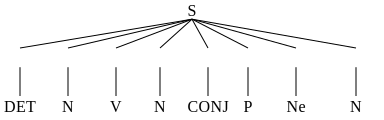

In [177]:
vasf_ext(tagger.tag(mesra_tokens[100][0]))

In [178]:
mosufs = []
gheids = []
for sentence in tqdm.tqdm(mesra_tokens[0:HAFEZ_end]):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 8384/8384 [00:01<00:00, 6240.21it/s]


In [179]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]

In [180]:
mosuf_texts[0:10]

['عشق آسان',
 'جعد مشکینش',
 'سالک بی\u200cخبر',
 'شب تاریک',
 'چراغ مرده',
 'یاد خوشش',
 'رکن آباد',
 'کار شهرآشوب',
 'یار مستغنی',
 'روی زیبا']

In [181]:
results = {}

results['hafez'] = nltk.FreqDist(mosuf_texts).most_common(50)

In [183]:
mosufs = []
gheids = []
for sentence in tqdm.tqdm(mesra_tokens[SAADI_start::]):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 320323/320323 [00:50<00:00, 6388.22it/s]


In [184]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
mosuf_texts[0:10]

['عشق غالب',
 'گلبن خندان',
 'سرو آزاد',
 'گل صدبرگ',
 'لبت کبابی',
 'داروی دلپذیر',
 'سرو روان',
 'گلبن نو',
 'معاشران هشیار',
 'چراغ باز']

In [185]:
results['saadi'] = nltk.FreqDist(mosuf_texts).most_common(50)

In [186]:
pd.DataFrame(results)

,hafez,saadi
0,"(چشم بد, 10)","(چشم بد, 100)"
1,"(ماه نو, 6)","(چشم تر, 97)"
2,"(می ناب, 5)","(ماه نو, 83)"
3,"(یار سفرکرده, 5)","(سرو روان, 76)"
4,"(لب جوی, 5)","(دل خسته, 70)"
5,"(مرغ زیرک, 5)","(آب روان, 60)"
6,"(دل خوش, 5)","(می نوش, 57)"
7,"(می صاف, 5)","(دل پر, 56)"
8,"(خانه خمار, 4)","(دل تنگ, 51)"
9,"(خط مشکین, 4)","(دل دیوانه, 50)"


# Keyword Extraction

In [189]:
#hafez = ' '.join([' '.join(s[0]) for s in mesra_tokens[0:8384]])
#saadi = ' '.join([' '.join(s[0]) for s in mesra_tokens[9384::]])
hafez= ' '.join(hafez_tokens_nonstop)
saadi= ' '.join(saadi_tokens_nonstop)

In [190]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(hafez)

for kw in keywords:
	print(kw)

('صبا خوش باد', 1.5717310111874307e-06)
('باد جان حافظ', 1.7620589953381176e-06)
('خاک کوی دوست', 2.0258379256253233e-06)
('جهان کار جهان', 2.0599975722001165e-06)
('حافظ دست زلف', 2.135603936274367e-06)
('خوش باد جان', 2.3152418604929834e-06)
('چشم مست یار', 2.355612085393515e-06)
('جام حافظ دست', 2.4005425339080584e-06)
('باد صبا بوی', 2.448761975715962e-06)
('حافظ خوش جهان', 2.4560940828741507e-06)
('دوست دست حافظ', 2.498288135019821e-06)
('باده دست حافظ', 2.6190903209798626e-06)
('خاک حافظ یار', 2.635852383974259e-06)
('دست دست زلف', 2.658976794178031e-06)
('باد جان دوست', 2.743931474301421e-06)
('دوست باد جان', 2.743931474301421e-06)
('جان جهان دست', 2.773468764968607e-06)
('باد یاد باد', 2.8053540950900776e-06)
('خون باد چشم', 2.944722766370703e-06)
('باد صبا چشم', 3.0790782504342644e-06)


In [156]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(saadi)

for kw in keywords:
	print(kw)

('جان جان جان', 2.2833394836229527e-07)
('جان جان', 1.1366942435601514e-06)
('عشق جان جان', 1.1847028962732852e-06)
('جان عشق جان', 1.3539461671694688e-06)
('جان', 1.5088792562298606e-06)
('جان جان عشق', 1.5796038616977135e-06)
('عشق', 2.3731267635454816e-06)
('عشق جان', 2.6261297938395834e-06)
('جان جهان', 3.778347811642447e-06)
('جان جهان جهان', 4.216109601275181e-06)
('درد عشق جان', 4.341958210280962e-06)
('جان جان مرا', 4.348109238077564e-06)
('چشم', 4.431687115744769e-06)
('عشق جانان جان', 4.974286549321777e-06)
('جان عشق', 5.140509383685994e-06)
('مرا', 5.385551363975612e-06)
('آتش عشق جان', 5.889191660781143e-06)
('عشق عشق جان', 5.9606705171342234e-06)
('دست', 6.065432213443196e-06)
('درد درد عشق', 6.509548927675216e-06)


# Dadma Tools

In [9]:
import dadmatools.pipeline.language as language

# here lemmatizer and pos tagger will be loaded
# as tokenizer is the default tool, it will be loaded as well even without calling
pips = 'tok,lem,pos,dep,ner,chunk,cons,kasreh' 
nlp = language.Pipeline(pips)

# you can see the pipeline with this code
print(nlp.analyze_pipes(pretty=True))

Model fa_tokenizer exists in /home/media/.pernlp/fa_tokenizer.pt
Model fa_mwt exists in /home/media/.pernlp/fa_mwt.pt
Model fa_lemmatizer exists in /home/media/.pernlp/fa_lemmatizer.pt
Model parsbert exists in /home/media/.pernlp/parsbert.tar.gz
Model dependencyparser exists in /home/media/.pernlp/dependencyparser.pt
2022-10-24 06:16:04,891 loading file /home/media/miniconda3/lib/python3.9/site-packages/dadmatools/saved_models/dependencyparser/dependencyparser.pt
Model parsbert exists in /home/media/.pernlp/parsbert.tar.gz
Model postagger exists in /home/media/.pernlp/postagger.pt
2022-10-24 06:16:06,450 loading file /home/media/miniconda3/lib/python3.9/site-packages/dadmatools/saved_models/postagger/postagger.pt
Model fa_constituency exists in /home/media/.pernlp/fa_constituency.pt
Model ner exists in /home/media/.pernlp/ner.tar.gz
Model kasreh_ezafeh exists in /home/media/.pernlp/kasreh_ezafeh.pt


/home/media/miniconda3/lib/python3.9/site-packages/dadmatools/models/common/beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords
[2022-10-24 06:16:09,688 INFO] [Ensembling dict with seq2seq lemmatizer...]



============================= Pipeline Overview =============================

#   Component            Assigns       Requires   Scores   Retokenizes
-   ------------------   -----------   --------   ------   -----------
0   tokenizer                                              True       
                                                                      
1   lemmatize            token.lemma                       False      
                                                                      
2   dependancyparser     token.dep                         False      
                                                                      
3   postagger            token.pos                         False      
                                                                      
4   chunking                                               False      
                                                                      
5   constituencyparser                                     False    

In [10]:
doc = nlp('مسابقات کشتی در کشور ایران برگزار خواهد شد')

[2022-10-24 06:16:14,341 INFO] [Ensembling dict with seq2seq lemmatizer...]


In [17]:
doc._.ners

[[('[CLS]', 'O'),
  ('مسابقات', 'O'),
  ('کشتی', 'O'),
  ('در', 'O'),
  ('کشور', 'O'),
  ('ایران', 'B-location'),
  ('برگزار', 'O'),
  ('خواهد', 'O'),
  ('شد', 'O'),
  ('[SEP]', 'O')]]

In [16]:
doc._.constituency 

[(TOP (S (NP (NP (_ مسابقات)) (_ کشتی) (_ در) (_ کشور)) (PP (_ ایران) (NP (_ برگزار) (NP (_ خواهد) (_ شد))))))]

In [8]:
from spacy import displacy

displacy.serve(doc, style="dep")

/home/media/miniconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# Parsi-IO

# https://github.com/language-ml/parsi.io

In [158]:
from parsi_io.modules.address_extractions import AddressExtraction
extractor = AddressExtraction()
extractor.run('آدرس خیابان شهیدبهشتی کوچه ۲ می‌باشد و برای اطلاعات بیشتر به page.com مراجعه فرمایید')

{'address': ['آدرس خیابان شهیدبهشتی کوچه 2'],
 'email': [],
 'url': ['page.com'],
 'number': [],
 'address_span': [0, 28],
 'email_span': [],
 'url_span': [61, 69],
 'number_span': []}

In [161]:
from parsi_io.modules.number_extractor import NumberExtractor
extractor = NumberExtractor()
extractor.run('من در بیست و پنجمین روز فروردین سوار اتوبوس ۱۲ شدم.')

[{'span': [6, 16], 'phrase': 'بیست و پنج', 'value': 25},
 {'span': [44, 46], 'phrase': '۱۲', 'value': 12.0}]

# Weighted Levenshtein Distance

In [211]:
#!pip install -U strsimpy
import pandas as pd
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    return 2.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [212]:
print(weighted_levenshtein.distance('لانه', 'لثه'))

3.0


In [213]:
print(weighted_levenshtein.distance('لانه', 'لاله'))

2.0


In [40]:
print(weighted_levenshtein.distance('لانه', 'لستم'))

6.0


In [41]:
print(weighted_levenshtein.distance('لثه', 'لستم'))

5.0
